In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import livelossplot

In [2]:
with open('sample.txt', 'r') as file: text = file.read()

In [3]:
with open('shakespeare.txt', 'r') as file:

    text = file.read()

lines = text.lower().split('\n')

#print(lines)

In [4]:
from keras.preprocessing.text import text_to_word_sequence
words = text_to_word_sequence(text)

Using TensorFlow backend.


In [5]:
from keras.preprocessing.text import Tokenizer 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
tokens = tokenizer.word_index
#print(tokens)

In [6]:
vocabulary_size = len(tokens) + 1 
print(vocabulary_size)

460


In [7]:
sequences = tokenizer.texts_to_sequences(lines)

In [8]:
subsequences = []
for sequence in sequences:
    for i in range(1, len(sequence)): 
        subsequence = sequence[:i+1] 
        subsequences.append(subsequence)

In [9]:
from keras.preprocessing.sequence import pad_sequences 
sequence_length = max([len(sequence) for sequence in sequences])
sequences = pad_sequences(subsequences, maxlen=sequence_length, padding='pre')

In [10]:
x, y = sequences[:,:-1],sequences[:,-1]

In [11]:
from keras.utils import to_categorical
y = to_categorical(y, num_classes=vocabulary_size)

### Now create the Network

In [12]:
from keras.models import Sequential 
model = Sequential()

In [13]:
from keras.layers import Embedding
model.add(Embedding(input_dim = vocabulary_size, # 582
                    output_dim = 100,
                    input_length = sequence_length - 1)) # input_dim

Instructions for updating:
Colocations handled automatically by placer.


### Add input layer

In [14]:
from keras.layers import LSTM 
model.add(LSTM(units = 100))

### Add first hidden layer, with the dropout layer

In [15]:
from keras.layers import Dropout, Dense 
model.add(Dropout(0.1))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add Output Layer: The output layer is a fully-connected layer with the softmax activation function, and the output units are equal to the vocabulary size

In [16]:
model.add(Dense(units=vocabulary_size, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 148, 100)          46000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 460)               46460     
Total params: 172,860
Trainable params: 172,860
Non-trainable params: 0
_________________________________________________________________


### Use model.fit() to train the RNN using x and y for 500 training epochs

In [19]:
plot_loss_RNN = livelossplot.PlotLossesKeras()

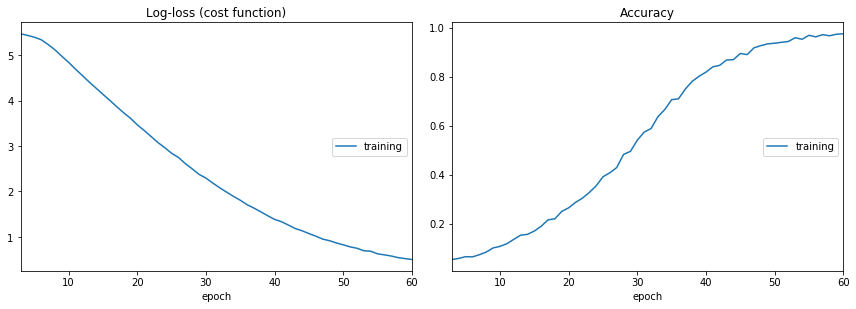

Log-loss (cost function):
training   (min:    0.501, max:    6.003, cur:    0.501)

Accuracy:
training   (min:    0.033, max:    0.975, cur:    0.975)


In [20]:
model.fit(x, y,callbacks = [plot_loss_RNN],epochs = 60) # Less epochs - Basic Model

In [21]:
model.fit(x, y, epochs=60)

Epoch 1/60
1119/1119 [==============================] - 5s 4ms/step - loss: 0.4642 - acc: 0.9786
Epoch 2/60
1119/1119 [==============================] - 4s 4ms/step - loss: 0.4504 - acc: 0.9803
Epoch 3/60
1119/1119 [==============================] - 4s 4ms/step - loss: 0.4267 - acc: 0.9777
Epoch 4/60
1119/1119 [==============================] - 5s 4ms/step - loss: 0.4054 - acc: 0.9866
Epoch 5/60
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3834 - acc: 0.9866
Epoch 6/60
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3698 - acc: 0.9839
Epoch 7/60
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3568 - acc: 0.9857
Epoch 8/60
1119/1119 [==============================] - 5s 4ms/step - loss: 0.3402 - acc: 0.9893
Epoch 9/60
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3182 - acc: 0.9875
Epoch 10/60
1119/1119 [==============================] - 4s 4ms/step - loss: 0.3080 - acc: 0.9902
Epoch 11/60
1119/1119 [======

### Evaluate the model

In [22]:
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 99.64%
